## 5장 로지스틱 회귀

In [7]:
# 매트릭스 롭이 내적으로 계산 되는 것 확인
import numpy as np
v1=np.array([1,2])
v2=np.array([3,4])
print v1*v2

print v1.dot(v2)
print np.inner(v1,v2)

[3 8]
11
11


In [5]:
m1=np.mat(v1)
m2=np.mat(v2)
print m1.T*m2
print m1*m2.T

[[3 4]
 [6 8]]
[[11]]


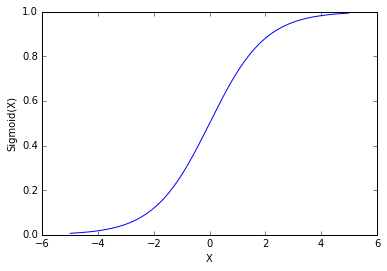

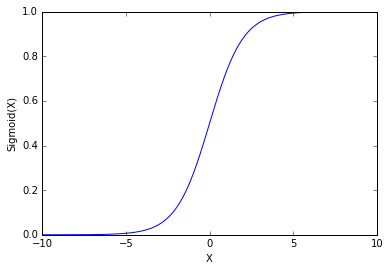

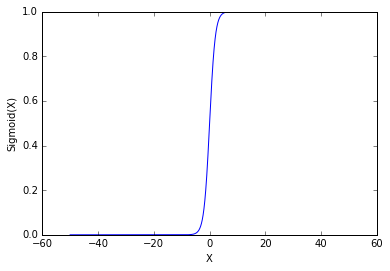

In [8]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt

# sigmaoid를 계산하는 함수
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def plotSigmoid(inX):
    fig = plt.figure() # 그림을 그릴 공간을 만듬
    ax = fig.add_subplot(111) # 1X1 공간의 1번 공간에 ax 그래프를 만듬
    x = arange(-inX, inX, 0.005) # 0.005 = Spacing between values
    y = sigmoid(x)
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Sigmoid(X)');
    plt.show()
    
plotSigmoid(5)
plotSigmoid(10)
plotSigmoid(50)

### 기울기 상승, 하강과 비슷한 알고리즘
- quadratic programming
- matlab cvx

In [22]:
from python_week06 import logRegres
import numpy as np

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('python_week06/testSet.txt')
    for line in fr.readlines(): # 메모리에 올리지 않고 한줄 씩 접근
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])]) # b, X1, X2 <= b 자리를 1.0 으로 대체
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error # 3x1 + 스칼라 * 3x100 * 100x1
#         print ('h: %s / error: %s / weights: %s' %(h, error, weights))
    return weights

dataArr, labelMat = loadDataSet()
# print dataArr
# print labelMat
gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [21]:
import numpy as np
o1 = np.ones(3)
o2 = np.ones((3,1))
print(o2)

[[ 1.]
 [ 1.]
 [ 1.]]


### 그래프로 그려보기

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


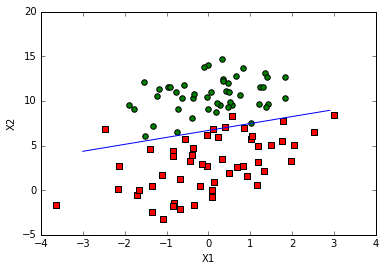

In [27]:
def plotBestFit(weights):
    # print "Weights type :", type(weights)
    # import matplotlib.pyplot as plt    #그래프를 그릴 모듈을 import
    dataMat,labelMat=loadDataSet()    #표현할 data를 불러 옴
    dataArr = array(dataMat)    #dataMat은 list 타입이므로 numpy의 Array 타입으로 변경
    n = shape(dataArr)[0]    #dataArr의 형태를 나타내는 첫번째 요소(열의 갯수)를 가져옴
    xcord1 = []; ycord1 = []    #첫 번째 그룹을 표현할 list를 생성
    xcord2 = []; ycord2 = []    #두 번째 그룹을 표현할 list를 생성
    for i in range(n):    #전체 열 만큼 loop를 실행
        if int(labelMat[i])== 1:    #1번 그룹이면
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:    #1번 그룹이 아니면
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()    #그림을 그릴 공간을 만듬
    ax = fig.add_subplot(111)    #1X1 공간의 1번 공간에 ax 그래프를 만듬
    
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]    #최적선 - 시그모이드 함수를 0으로 설정하였음
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

weights = gradAscent(dataArr, labelMat)
print weights.getA()
plotBestFit(weights.getA())

#### 확률 기울기 상승

확률 기울기 상승을 통한 로지스틱 회귀 최적선


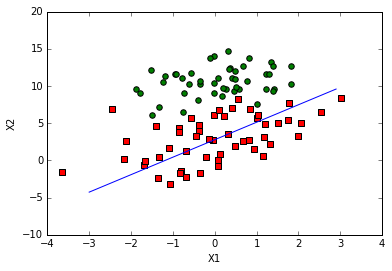

[ 1.01702007  0.85914348 -0.36579921]


In [31]:
"""
상승 Gradiant를 계산하는 함수
input: dataMatrix, classLabels
output: weights
"""
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        #변수 h와 error가 더 이상 벡터가 아니라 단일 값이다.
        weights = weights + alpha * error * dataMatrix[i]
#         print dataMatrix[i]*weights # 1x3
    return weights

dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
print('확률 기울기 상승을 통한 로지스틱 회귀 최적선')
plotBestFit(weights)
print weights

#### 수정된 확률 기울기 상승

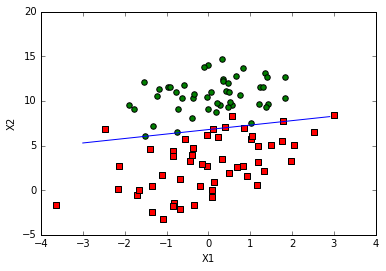

[ 13.88307545   1.02400885  -2.04587796]


In [32]:
"""
상승 Gradiant를 계산하는 함수 수정 - alpha의 값을 변경해주고, random한 data를 추출하여 weight를 계산
input: dataMatrix, classLabels, numIter
output: weights
"""
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = range(m)    #0~m-1까지의 index번호가 같은 배열을 생성(할당)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01    #apha decreases with iteration, does not 
            #알고리즘이 반복될 때 마다 alpha 값 변경 - 높은 빈도의 진동을 개선(반복할 때 마다 alpha값 작아짐)
            #일정한 간격(0.01)이 있기 때문에 절대로 0에 도달하지 못함(시간에 따라 변화하는 문제에 대응하기 위해) 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            #동일한 data를 두번 접근하지 않게 하기 위해 uniform하게 생성            
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])    #할당된 배열을 해제
    return weights

dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelMat)
plotBestFit(weights)
print weights

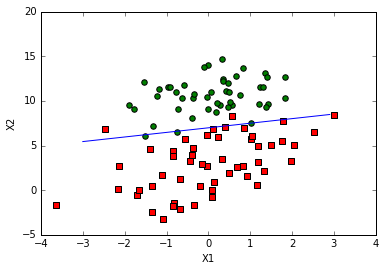

[ 15.04123183   1.10716075  -2.15372082]


In [33]:
weights = stocGradAscent1(array(dataArr), labelMat, 500)
plotBestFit(weights)
print weights

### 예제 : 말의 배앓이 치사율

In [34]:
from python_week06 import logRegres
import numpy as np

def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('python_week06/horseColicTraining.txt'); frTest = open('python_week06/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print "the error rate of this test is: %f" % errorRate
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests))

    
reload(logRegres)
logRegres.multiTest()

the error rate of this test is: 0.253731
the error rate of this test is: 0.268657
the error rate of this test is: 0.373134
the error rate of this test is: 0.283582
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.343284
the error rate of this test is: 0.358209
the error rate of this test is: 0.373134
after 10 iterations the average error rate is: 0.332836


python_week06\logRegres.py:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+exp(-inX))
